# LangChain and LangGraph

In [1]:
!python -m pip install langchain langchain-core langchain-community langchain-experimental --quiet
!python -m pip install langchain-openai --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langflow 1.0.14 requires google-search-results<3.0.0,>=2.4.1, which is not installed.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
streamlit 1.36.0 requires pillow<11,>=7.1.0, but you have pillow 11.3.0 which is incompatible.
streamlit 1.36.0 requires protobuf<6,>=3.20, but you have protobuf 6.32.1 which is incompatible.
streamlit 1.36.0 requires watchdog<5,>=2.1.5; platform_system != "Darwin", but you have watchdog 6.0.0 which is incompatible.
opentelemetry-instrumentation 0.50b0 requires opentelemetry-semantic-conventions==0.50b0, but you have opentelemetry-semantic-conventions 0.58b0 which is incompatible.
opentelemetry-instrumentation-fastapi 0.50b0 requires opentelemetry-semantic-conventions==0.50b0, but you have opentelemetry-semantic-con

In [2]:
model_name='gpt-4o-mini'

### Chatmodels, Prompt Templates and Parsers

In [3]:
from langchain_openai import AzureChatOpenAI
model = AzureChatOpenAI(model=model_name)

# use it as an LLM -> pass a prompt
prompt = "Write a poem about the city Bangalore"
response = model.invoke(prompt)
print(response.content)

In the heart of the Deccan, where the gardens bloom bright,  
Lies a city of dreams, bathed in soft morning light.  
Bangalore, oh Bangalore, with your skies painted blue,  
A tapestry woven of old and of new.  

From bustling bazaars where the spices entice,  
To tech-laden towers, where innovation is nice,  
The hum of the traffic sings songs of the day,  
As rickshaws and whispers weave pathways of play.  

Café corners buzz with the laughter of friends,  
And the aroma of coffee that never quite ends.  
In Cubbon Park’s embrace, the weary find peace,  
As nature's green canvas invites sweet release.  

The echoes of history in every old stone,  
From palaces regal to temples alone.  
The rhythm of culture, a dance in the streets,  
Where every encounter is a heartbeat that beats.  

Street food delights, with flavors that dance,  
Pani puri and dosa, a culinary romance.  
In the evenings, the city ignites with a spark,  
As nightlife awakens, igniting the dark.  

Oh Bangalore, cit

In [4]:
# use it as a chatmodel - pass a chatprompt

from langchain_core.messages import HumanMessage

message = [HumanMessage(content="Hi How are you?")]
model.invoke(message)


AIMessage(content="Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 12, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_efad92c60b', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_t

In [5]:
# chat prompt template
from langchain_core.prompts import ChatPromptTemplate

system_prompt = "Translate the following into the language {language}"
prompt_temp = ChatPromptTemplate([("system",system_prompt),("user","{text}")])
prompt_temp

ChatPromptTemplate(input_variables=['language', 'text'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], template='Translate the following into the language {language}')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], template='{text}'))])

In [6]:
prompt_temp.input_variables

['language', 'text']

In [7]:
myprompt = prompt_temp.invoke({"language":"French","text":"Hi How are you?"})
myprompt

ChatPromptValue(messages=[SystemMessage(content='Translate the following into the language French'), HumanMessage(content='Hi How are you?')])

In [8]:
op = model.invoke(myprompt)
op

AIMessage(content='Salut, comment ça va ?', response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 23, 'total_tokens': 30, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_efad92c60b', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'filtered': False, 'detected': False}, 'protected_material_text': {'filtered': False, 'd

In [9]:
from langchain_core.output_parsers import StrOutputParser
parser = StrOutputParser()
parser.invoke(op)

'Salut, comment ça va ?'

## Automation using Chains: Automations / Automation Flows / Chains / Chain Workflows
- static workflows involving LLMs inbetween the steps, 
- the flow of data, steps are deterministic, decided by the developer/SME

**Example**

Language Translation Chain: input -----> [Prompt Templates >> LLM >> Parser ]----> Output

In [10]:
# chat prompt template
from langchain_core.prompts import ChatPromptTemplate
system_prompt = "Translate the following into the language {language}"
prompt_temp = ChatPromptTemplate([("system",system_prompt),("user","{text}")])

# initialize llm
from langchain_openai import AzureChatOpenAI
model = AzureChatOpenAI(model=model_name)

# initialize parser
from langchain_core.output_parsers import StrOutputParser
parser = StrOutputParser()

In [10]:
# implement a chain using langchain
chain1 = prompt_temp | model | parser

chain1.invoke({"language":"telugu","text":"WHAT IS YOUR NAME?"})

'మీ పేరు ఏమిటి?'

In [12]:
def format_output(text):
    return {"Translation":text}

In [13]:
# implement a chain using langchain
chain1 = prompt_temp | model | parser | format_output

chain1.invoke({"language":"telugu","text":"WHAT IS YOUR NAME?"})

{'Translation': 'మీ పేరు ఏమిటి?'}

#### Code Chain

In [14]:
# Code generation chain
generate_prompt = ChatPromptTemplate([("system","Write a simple code for the task, only provide code no other additional text"),
                                      ("user","{task}")])

generation_chain = generate_prompt | model | parser

op = generation_chain.invoke("fibonacci series")
print(op)

```python
def fibonacci(n):
    fib_sequence = []
    a, b = 0, 1
    for _ in range(n):
        fib_sequence.append(a)
        a, b = b, a + b
    return fib_sequence

# Example usage
n = 10
print(fibonacci(n))
```


In [15]:
analyze_prompt = ChatPromptTemplate([("system","Analyze the provided code, add docstrings and comments. only provide code no other additional text"),
                                      ("user","{code}")])

analyze_chain = analyze_prompt | model | parser
print(analyze_chain.invoke({"code":op}))

```python
def fibonacci(n):
    """Generate a Fibonacci sequence of length n.

    Args:
        n (int): The number of terms in the Fibonacci sequence to generate.

    Returns:
        list: A list containing the Fibonacci sequence up to the nth term.
    """
    fib_sequence = []  # Initialize an empty list to store the Fibonacci sequence
    a, b = 0, 1  # Starting values for the Fibonacci sequence: F(0) = 0, F(1) = 1
    
    # Generate Fibonacci numbers up to n terms
    for _ in range(n):
        fib_sequence.append(a)  # Append the current Fibonacci number to the sequence
        a, b = b, a + b  # Update a and b to the next two Fibonacci numbers
        
    return fib_sequence  # Return the generated Fibonacci sequence

# Example usage
n = 10  # Define the number of terms in the Fibonacci sequence to generate
print(fibonacci(n))  # Print the Fibonacci sequence of length n
```


In [16]:
def patch_inputs (code):
    return {"code":code}

final_chain = generation_chain | patch_inputs | analyze_chain
op = final_chain.invoke({"task":"fibonacci series"})
print(op)

```python
def fibonacci(n):
    """
    Generate a Fibonacci series up to the n-th term.

    The Fibonacci series is a sequence where each number is the sum of the two preceding ones,
    typically starting with 0 and 1.

    Parameters:
    n (int): The number of terms in the Fibonacci series to generate.

    Returns:
    list: A list containing the Fibonacci series up to the n-th term.
    """
    # Initialize the Fibonacci series with the first two terms
    fib_series = [0, 1]
    
    # Calculate the Fibonacci numbers from the 3rd term to the n-th term
    for i in range(2, n):
        # Calculate the next Fibonacci number
        next_fib = fib_series[-1] + fib_series[-2]
        # Append the new number to the series
        fib_series.append(next_fib)
    
    # Return the Fibonacci series truncated to n terms
    return fib_series[:n]

# Example usage
print(fibonacci(10))  # Output the first 10 terms of the Fibonacci series
```


In [17]:
final_chain = generate_prompt | model | parser | patch_inputs | analyze_prompt | model | parser
op = final_chain.invoke({"task":"fibonacci series"})
print(op)

```python
def fibonacci(n):
    """
    Generate a Fibonacci series of length n.

    The Fibonacci series is a sequence of numbers where each number 
    is the sum of the two preceding ones, typically starting with 
    0 and 1.

    Parameters:
    n (int): The number of terms in the Fibonacci series to generate.

    Returns:
    list: A list containing the Fibonacci series up to n terms.
    """
    fib_series = []  # Initialize an empty list to store the Fibonacci series
    a, b = 0, 1     # Starting values for the Fibonacci sequence
    for _ in range(n):  # Iterate n times to generate n Fibonacci numbers
        fib_series.append(a)  # Append the current Fibonacci number to the series
        a, b = b, a + b  # Update a and b to the next two Fibonacci numbers
    return fib_series  # Return the completed Fibonacci series

# Example usage
n = 10  # Define the number of terms to generate
print(fibonacci(n))  # Print the Fibonacci series for the given number of terms
```


### Tools with Langchain

In [18]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wiki = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(top_k_results=2))

wiki.invoke("Artificial Intelligence")

'Page: Artificial intelligence\nSummary: Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.\nHigh-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., language models and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into gener

In [19]:
print(wiki.name)
print(wiki.description)
print(wiki.args)

wikipedia
A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.
{'query': {'title': 'Query', 'description': 'query to look up on wikipedia', 'type': 'string'}}


In [20]:
search_prompt = ChatPromptTemplate.from_template("generate a query to be searched on wikipedia for a given user inputs {input} . keep it short")

chain = search_prompt | model | parser | wiki | parser

chain.invoke({"input":"I am interested in world war II"})

'Page: Clate\nSummary: Clate (also known as Clett) is a hamlet and ward in southwestern Whalsay in the parish of Nesting in the Shetland Islands of Scotland.\n\nPage: Military budget of the United States\nSummary: The military budget of the United States is the largest portion of the discretionary federal budget allocated to the Department of Defense (DoD), or more broadly, the portion of the budget that goes to any military-related expenditures. It pays the salaries, training, and health care of uniformed and civilian personnel, maintains arms, equipment and facilities, funds operations, and develops and buys new items. The budget funds six branches of the US military: the Army, Navy, Marine Corps, Coast Guard, Air Force, and Space Force.'

## Getting started with LangGraph

- compatiable with langchain tools: langchain, langsmith, langfuse, openai
- represent codes/functions/code_blocks as nodes and represent interactions as connections in graph



Key components

- Node: individual step/action (a function which makes llm call)
- Edges: connection between nodes, define the exection flow between nodes
- Graph: collection of nodes and edges, a complete structures
- State: a shared data structure followed by all nodes and connections ( a common schema)

In [57]:
# Initialize the state

from typing import TypedDict

class datastate(TypedDict):
    userinput:str
    usecases:dict


In [64]:
# node 1
def generate_prompt_solutions(state:datastate):
    prompt = f"For the provided industry {state['userinput']} Identify 2 prompt based solutions. Prompt based solutions are the ones which simple LLM focused, single step and can have a prompt tempates, only provide a list of 2 case names"
    output = model.invoke(prompt).content
    usecases = state['usecases']
    usecases['prompt_based'] = output
    return {'usecases':usecases}


# node 2
def generate_rag_solutions(state:datastate):
    prompt = f"""For the provided industry {state['userinput']} Identify 2 RAG based solutions. 
    RAG based solutions are the ones, where the LLM response depdens on private or domain specific knowledge.
    , only provide a list of 2 case names"""
    output = model.invoke(prompt).content
    usecases = state['usecases']
    usecases['rag_based'] = output
    return {'usecases':usecases}

# node 3
def generate_agentic_solutions(state:datastate):
    prompt = f"""For the provided industry {state['userinput']} Identify 2 Agentic Workflow based solutions. 
    Agentic workflows are used, where the business process is not deterministic and need dynamic decision making and tool calls. 
    , only provide a list of 2 case names"""
    output = model.invoke(prompt).content
    usecases = state['usecases']
    usecases['agentic'] = output
    return {'usecases':usecases}


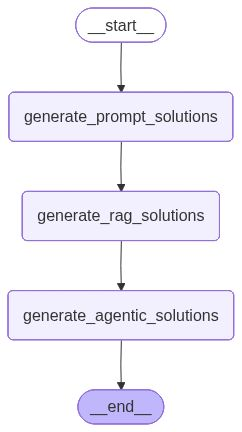

In [65]:
from langgraph.graph import StateGraph, START, END

graphbuilder = StateGraph(datastate)

graphbuilder.add_node(generate_agentic_solutions)
graphbuilder.add_node(generate_prompt_solutions)
graphbuilder.add_node(generate_rag_solutions)

graphbuilder.add_edge(START,"generate_prompt_solutions")
graphbuilder.add_edge("generate_prompt_solutions","generate_rag_solutions")
graphbuilder.add_edge("generate_rag_solutions","generate_agentic_solutions")
graphbuilder.add_edge("generate_agentic_solutions",END)
graph = graphbuilder.compile()
graph

In [66]:
response = graph.invoke({"userinput":"Finance","usecases":{}})

In [67]:
response

{'userinput': 'Finance',
 'usecases': {'prompt_based': '1. **Expense Report Generation**\n2. **Investment Summary Report**',
  'rag_based': '1. Credit Risk Assessment Tool  \n2. Regulatory Compliance Monitoring System',
  'agentic': '1. Intelligent Loan Approval System  \n2. Dynamic Risk Assessment Platform'}}

In [5]:
from dotenv import load_dotenv
load_dotenv()

True

In [68]:
# initiate a state

from typing import TypedDict

class myState(TypedDict):
    query:str
    response:str
    

In [69]:
# create a node

from langchain_openai import AzureChatOpenAI
from langchain.prompts import PromptTemplate

llm = AzureChatOpenAI(model=model_name)

# define a node: a node will alwaystake state (myState) as input and return state variables as output
def assistant(state:myState)->myState:
    prompt = PromptTemplate(input_variables=["query"],
                            template="Anwer the question in concise way {query}")
    
    response = llm.invoke(prompt.format(query=state['query'])).content
    return {"response":response}


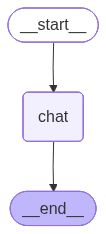

In [70]:
# build graph
from langgraph.graph import StateGraph,START,END

builder = StateGraph(myState)
builder.add_node("chat",assistant)
builder.add_edge(START,"chat")
builder.add_edge("chat",END)

graph = builder.compile()
graph

In [71]:
result = graph.invoke({"query":"What is capital of Canada?"})
print(result)

{'query': 'What is capital of Canada?', 'response': 'The capital of Canada is Ottawa.'}


In [72]:
print(result['response'])

The capital of Canada is Ottawa.


In [11]:
class myState(TypedDict):
    query:str
    response:str
    valid:bool

In [73]:
# adding an additional node: validting the input

# adding a node: checker which checks the input and validates based on certain rules
def checker(state:myState)->myState:
    if len(state['query'].strip())<10:
        return {"valid":False,"response":"ENTER A VALID QUESTION"}
    else:
        return {"valid":True}

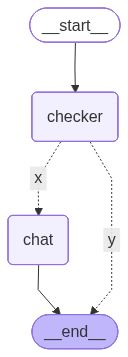

In [74]:
builder = StateGraph(myState)

builder.add_node("checker",checker)
builder.add_node("chat",assistant)

# add connection
builder.add_edge(START,"checker")


# add a conditional edge
def route(state:myState):
    if state['valid']:
        return "x"
    else:
        return "y"
    
builder.add_conditional_edges("checker",route,{"x":"chat","y":END})
builder.add_edge("chat",END)


graph = builder.compile()
graph

In [75]:
result = graph.invoke({"query":"what is capital of France?"})
print(result)

{'query': 'what is capital of France?', 'response': 'The capital of France is Paris.'}


In [76]:
result = graph.invoke({"query":"what ?       "})
print(result)

{'query': 'what ?       ', 'response': 'ENTER A VALID QUESTION'}


## Code Chain

- Generate code, analyze code

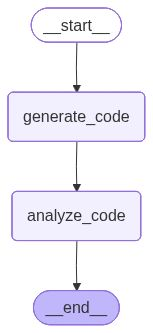

In [87]:
from typing import TypedDict
from langchain_openai import AzureChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
llm = AzureChatOpenAI(model=model_name)

class simpleState(TypedDict):
    code:str
    task:str
    modified_code:str


def generate_code(state:simpleState)->simpleState:
    generate_prompt = ChatPromptTemplate([("system","Write a simple code for the task, only provide code no other additional text"),
                                      ("user","{task}")])
    code = llm.invoke(generate_prompt.invoke({"task":state["task"]})).content
    return {"code":code}


def analyze_code(state:simpleState)->simpleState:
    analyze_prompt = ChatPromptTemplate([("system","Analyze the provided code, add docstrings and comments. only provide code no other additional text"),
                                      ("user","{code}")])
    modified_code = llm.invoke(analyze_prompt.invoke({"code":state["code"]})).content
    return {"modified_code":modified_code}


builder = StateGraph(simpleState)
builder.add_sequence([generate_code,analyze_code])
builder.add_edge(START,"generate_code")
builder.add_edge('analyze_code',END)
graph = builder.compile()
graph

    

In [80]:
result = graph.invoke({"task":"FIBONACCI SERIES"})

In [81]:
print(result)

{'code': '```python\ndef fibonacci(n):\n    fib_sequence = []\n    a, b = 0, 1\n    for _ in range(n):\n        fib_sequence.append(a)\n        a, b = b, a + b\n    return fib_sequence\n\n# Example usage\nn = 10  # Change this value for a different length of the series\nprint(fibonacci(n))\n```', 'task': 'FIBONACCI SERIES', 'modified_code': '```python\ndef fibonacci(n):\n    """\n    Generate a Fibonacci sequence of length n.\n\n    The Fibonacci sequence is a series of numbers where each number \n    is the sum of the two preceding ones, starting from 0 and 1.\n\n    Parameters:\n    n (int): The length of the Fibonacci sequence to generate.\n\n    Returns:\n    list: A list containing the Fibonacci sequence of length n.\n    """\n    fib_sequence = []  # Initialize an empty list to store the Fibonacci sequence\n    a, b = 0, 1  # Start with the first two Fibonacci numbers\n\n    # Generate the Fibonacci sequence\n    for _ in range(n):\n        fib_sequence.append(a)  # Append the cu

In [82]:
print(result['code'])

```python
def fibonacci(n):
    fib_sequence = []
    a, b = 0, 1
    for _ in range(n):
        fib_sequence.append(a)
        a, b = b, a + b
    return fib_sequence

# Example usage
n = 10  # Change this value for a different length of the series
print(fibonacci(n))
```


In [83]:
print(result['modified_code'])

```python
def fibonacci(n):
    """
    Generate a Fibonacci sequence of length n.

    The Fibonacci sequence is a series of numbers where each number 
    is the sum of the two preceding ones, starting from 0 and 1.

    Parameters:
    n (int): The length of the Fibonacci sequence to generate.

    Returns:
    list: A list containing the Fibonacci sequence of length n.
    """
    fib_sequence = []  # Initialize an empty list to store the Fibonacci sequence
    a, b = 0, 1  # Start with the first two Fibonacci numbers

    # Generate the Fibonacci sequence
    for _ in range(n):
        fib_sequence.append(a)  # Append the current Fibonacci number to the sequence
        a, b = b, a + b  # Update a and b to the next two Fibonacci numbers

    return fib_sequence  # Return the complete Fibonacci sequence

# Example usage
n = 10  # Change this value for a different length of the series
print(fibonacci(n))  # Print the Fibonacci sequence of length n
```
